# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

Load feature names.

In [12]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [13]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [14]:
def run_pca():
    print("Explained variance in the training data:")
    for n in range(1, 51):
        pca = PCA(n_components=n)
        pca.fit(train_data)
        print("For k={}: {}".format(n, sum(pca.explained_variance_ratio_)))

run_pca()

Explained variance in the training data:
For k=1: 0.16404331279334225
For k=2: 0.29727810148765976
For k=3: 0.3990126667089884
For k=4: 0.4696462310120422
For k=5: 0.5083126738873003
For k=6: 0.5451207285104142
For k=7: 0.5764031179741135
For k=8: 0.6037401639631159
For k=9: 0.6299049848188799
For k=10: 0.6522135241152409
For k=11: 0.672694949983207
For k=12: 0.6913787727895901
For k=13: 0.708669359008835
For k=14: 0.7254656817456238
For k=15: 0.7406697919365356
For k=16: 0.7557385674316712
For k=17: 0.770035294277242
For k=18: 0.7841889336549758
For k=19: 0.7974442682739963
For k=20: 0.8089283215372587
For k=21: 0.8195491891340988
For k=22: 0.830164290135407
For k=23: 0.8405802865918022
For k=24: 0.8505178038552919
For k=25: 0.8596349602806014
For k=26: 0.8683625563875949
For k=27: 0.8762388593785981
For k=28: 0.8840422614451154
For k=29: 0.8914939989676897
For k=30: 0.8984912948352591
For k=31: 0.9049156563429035
For k=32: 0.911027078744698
For k=33: 0.9167873903659242
For k=34: 0.92

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

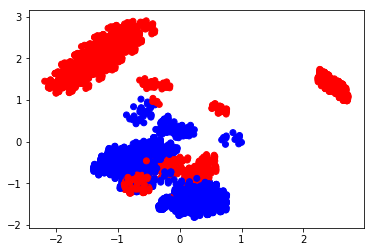

In [17]:
def plot_data():
    pca = PCA(n_components=2)
    decomposed_train_data = pca.fit_transform(train_data)
    plt.scatter(decomposed_train_data[:, 1], decomposed_train_data[:, 0], cmap=matplotlib.colors.ListedColormap(['b', 'r']), c=train_labels)

plot_data()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

#clusters = 1


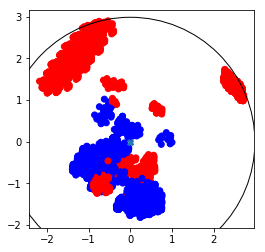

#clusters = 2


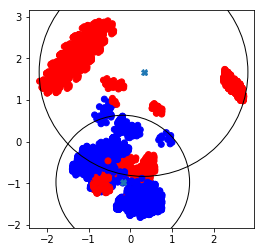

#clusters = 3


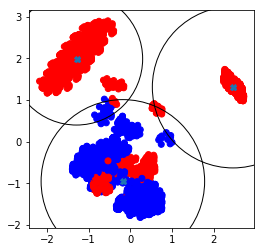

#clusters = 4


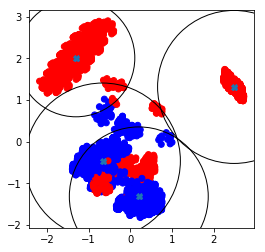

#clusters = 5


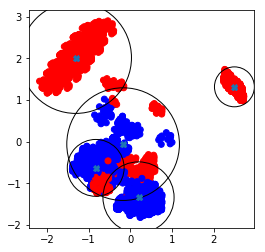

#clusters = 6


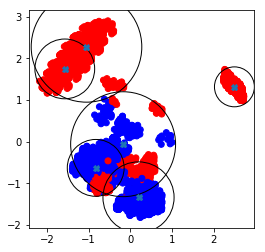

#clusters = 7


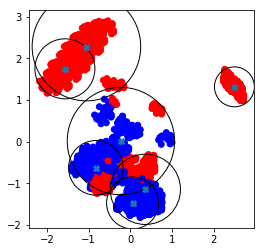

#clusters = 8


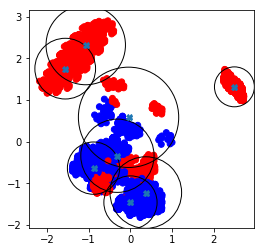

#clusters = 9


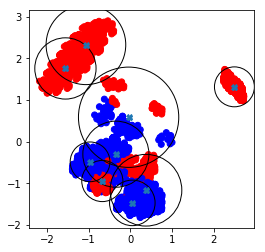

#clusters = 10


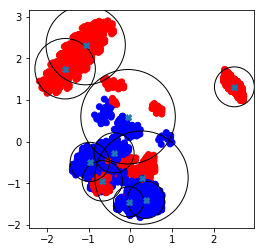

#clusters = 11


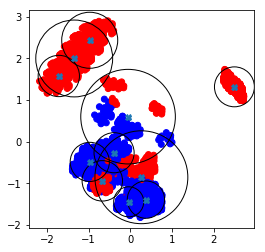

#clusters = 12


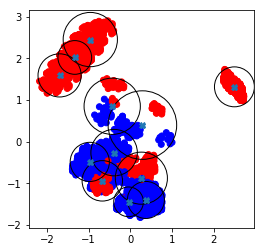

#clusters = 13


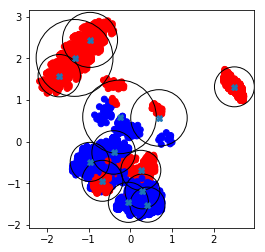

#clusters = 14


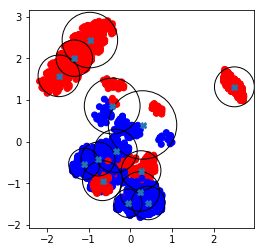

#clusters = 15


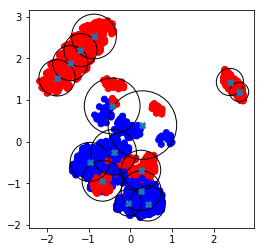

#clusters = 16


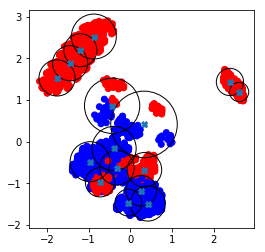

In [50]:
from sklearn.metrics import pairwise_distances

def visualize_clusters():
    pca = PCA(n_components=2)
    decomposed_train_data = pca.fit_transform(train_data)

    for n in range(1, 17):
        print("#clusters = {}".format(n))
        
        # Train a KMeans model and get cluster distances and predictions about which cluster each sample belongs to
        model = KMeans(n_clusters=n).fit(decomposed_train_data)
        cluster_predictions = model.predict(decomposed_train_data)
        cluster_distances = model.transform(decomposed_train_data)
        
        # get the distance of farthest sample for each cluster
        max_distances = np.zeros(n)
        for i in range(len(cluster_distances)):
            if cluster_distances[i][cluster_predictions[i]] > max_distances[cluster_predictions[i]]:
                max_distances[cluster_predictions[i]] = cluster_distances[i][cluster_predictions[i]]

        # Plot
        fig, ax = plt.subplots(1)
        ax.set_aspect('equal')
        ax.scatter(decomposed_train_data[:,1], decomposed_train_data[:,0], c=train_labels, cmap=matplotlib.colors.ListedColormap(['b','r']))
        ax.plot(model.cluster_centers_[:,1], model.cluster_centers_[:,0], 'X')
        for i in range(len(model.cluster_centers_)):
            ax.add_patch(matplotlib.patches.Circle((model.cluster_centers_[i][1], model.cluster_centers_[i][0]), max_distances[i], ec='black', fc='none'))

        plt.show()
        
visualize_clusters()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

Covariance matrix type: spherical


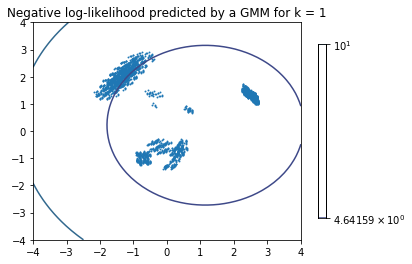

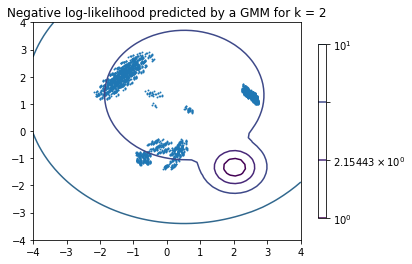

/Users/rutika/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


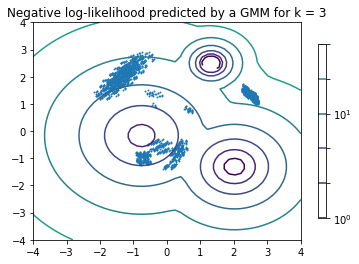

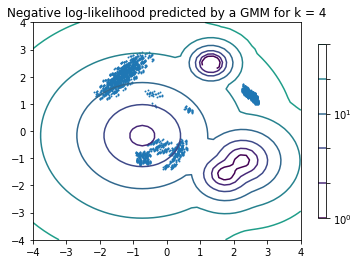

Covariance matrix type: diag


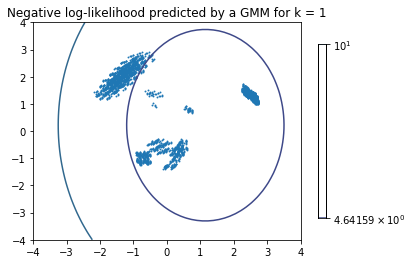

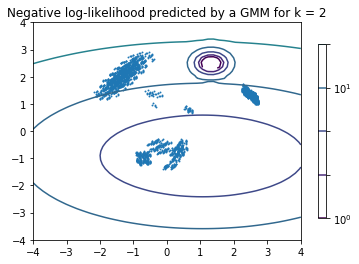

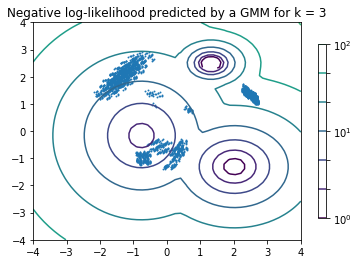

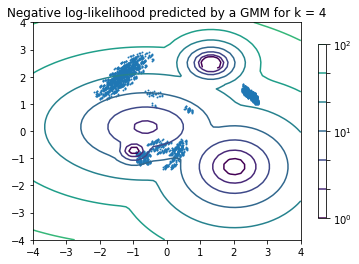

Covariance matrix type: tied


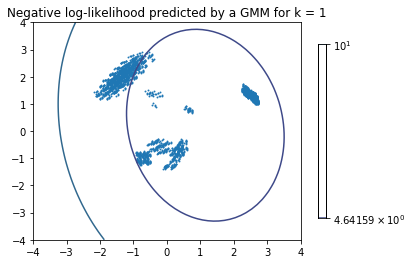

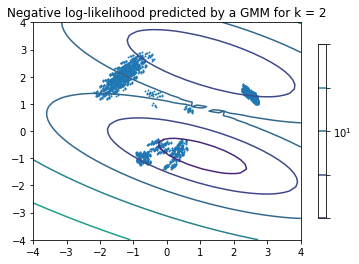

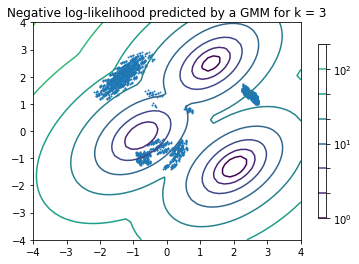

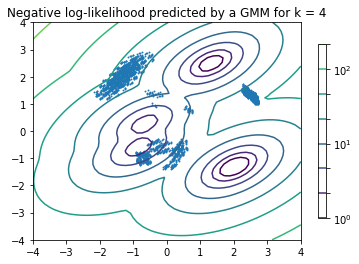

Covariance matrix type: full


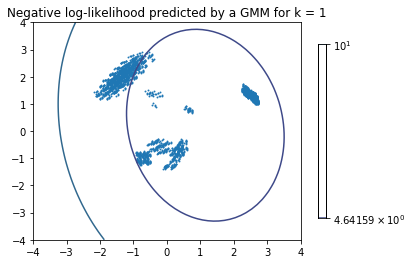

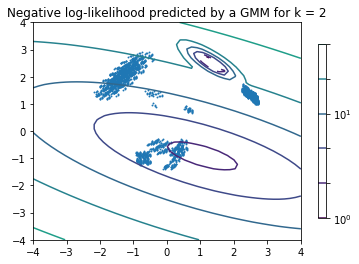

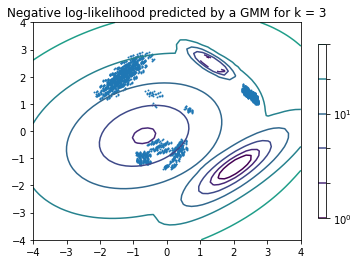

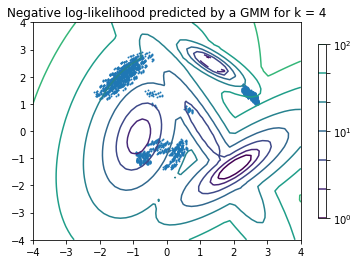

In [32]:
def P4():
    for cov in ['spherical', 'diag', 'tied', 'full']:
        print("Covariance matrix type: {}".format(cov))
        for k in range(1,5):
            pca = PCA(n_components=2)
            decomposed_train_data = pca.fit_transform(train_data)
            
            # train model on positive data only
            postive_data = decomposed_train_data[np.where(train_labels == 1)]
            model = GaussianMixture(n_components=k, covariance_type=cov)
            model.fit(postive_data)

            # display predicted scores by the model as a contour plot
            x = np.linspace(-4., 4.)
            y = np.linspace(-4., 4.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -model.score_samples(XX)
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(postive_data[:, 1], postive_data[:, 0], .8)

            plt.title("Negative log-likelihood predicted by a GMM for k = {}".format(k))
            plt.axis("tight")
            plt.show()

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [38]:
def P5():
    pca = PCA(n_components=2)
    decomposed_train_data = pca.fit_transform(train_data)
    decomposed_test_data = pca.transform(test_data)

    # train 2 GMM models, one for positive data and another for negative data
    positive_data = decomposed_train_data[np.where(train_labels == 1)]
    positive_model = GaussianMixture(n_components=4, covariance_type='full')
    positive_model.fit(positive_data)

    negative_data = decomposed_train_data[np.where(train_labels == 0)]
    negative_model = GaussianMixture(n_components=4, covariance_type='full')
    negative_model.fit(negative_data)

    # get sample scores
    positive_scores = positive_model.score_samples(decomposed_test_data)
    negative_scores = negative_model.score_samples(decomposed_test_data)

    # compare scores
    results = (positive_scores > negative_scores).astype('int')

    # Score accuracy and print
    print("Accuracy = {}".format(metrics.accuracy_score(test_labels, results)))

P5()

Accuracy = 0.9483985765124555


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [49]:
def P6():
    highest_accuracy = 0
    params = {}

    for cov in ['full', 'tied', 'diag', 'spherical']:
        # for dimensions in range 1-12
        for num_dimensions in range(1,13):
            # for clusters in range 1-12
            for num_components in range(1,13):
                if cov == 'full':
                    cov_factor = 2
                elif cov == 'tied':
                    cov_factor = 2
                elif cov == 'diag':
                    cov_factor = 1
                elif cov == 'spherical':
                    cov_factor = 0

                # calculate number of parameters
                num_params = ((num_dimensions + num_dimensions ** cov_factor) * num_components) * 2

                # skip if number of parameteres is greater than 50
                if num_params > 50:
                    continue

                pca = PCA(n_components=num_dimensions)
                decomposed_train_data = pca.fit_transform(train_data)
                decomposed_test_data = pca.fit_transform(test_data)

                # train 2 GMM models, one for positive data and another for negative data
                positive_data = decomposed_train_data[np.where(train_labels == 1)]
                positive_model = GaussianMixture(n_components=num_components, covariance_type=cov)
                positive_model.fit(positive_data)

                negative_data = decomposed_train_data[np.where(train_labels == 0)]
                negative_model = GaussianMixture(n_components=num_components, covariance_type=cov)
                negative_model.fit(negative_data)

                # compute per sample scores
                positive_scores = positive_model.score_samples(decomposed_test_data)
                negative_scores = negative_model.score_samples(decomposed_test_data)

                # compare probabilities
                results = (positive_scores > negative_scores).astype('int')

                # score accuracy and print
                accuracy = metrics.accuracy_score(test_labels, results)
                
                if accuracy >= highest_accuracy:
                    highest_accuracy = accuracy
                    params = {'pca_components': num_dimensions, 'gmm_components': num_components, 'cov_type': cov, 'accuracy': accuracy}
                    
    print("Highest accuracy was found for following parameters")
    print("PCA Components: {}; GMM Components: {}, Covariance Type: {}, Accuracy: {}".format(params['pca_components'], params['gmm_components'], params['cov_type'], params['accuracy']))

P6()

Highest accuracy was found for following parameters
PCA Components: 3; GMM Components: 6, Covariance Type: spherical, Accuracy: 0.9457295373665481
